In [35]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [4]:
rf = RandomForestRegressor()

In [9]:
properties_df = pd.read_csv("properties-17837-enriched.csv")

In [8]:
list(properties_df.columns)

['Unnamed: 0',
 'list-card',
 'list-card-info',
 'list-card-addr',
 'list-card-type',
 'list-card-price',
 'list-card-details',
 'beds',
 'baths',
 'floorspace',
 'street',
 'location_nominatim',
 'location_ArcGIS',
 'location',
 'point',
 'latitude',
 'longitude',
 'altitude',
 'distance_to_math_dept']

In [19]:
inputs=pd.Index(['beds', 'baths', 'floorspace','distance_to_math_dept'])
target=pd.Index(['list-card-price'])

In [24]:
rf.fit(X=properties_df[inputs],y=properties_df[target])

<ipython-input-24-0854ff25f4ab>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X=properties_df[inputs],y=properties_df[target])


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
feature_importances_df = pd.DataFrame(dict(feature_importances=rf.feature_importances_,feature=inputs))

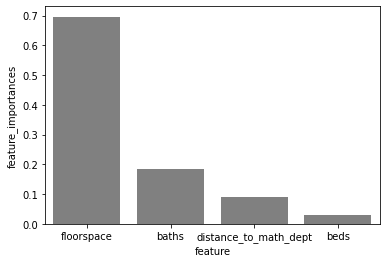

In [43]:
sns.barplot(
    data=feature_importances_df.sort_values('feature_importances',ascending=False),
    x='feature',
    y='feature_importances',
    color='grey'
)

In [45]:
properties_df['predicted_rf'] = rf.predict(X=properties_df[inputs])

In [52]:
properties_df['residual_rf'] = properties_df['list-card-price'] - properties_df['predicted_rf']

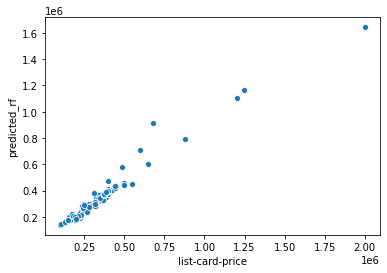

In [49]:
sns.scatterplot(data=properties_df,x='list-card-price',y='predicted_rf')

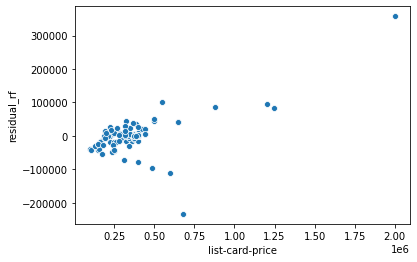

In [53]:
sns.scatterplot(data=properties_df,x='list-card-price',y='residual_rf')

/home/thom/venv38/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/thom/venv38/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/thom/venv38/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/thom/venv38/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


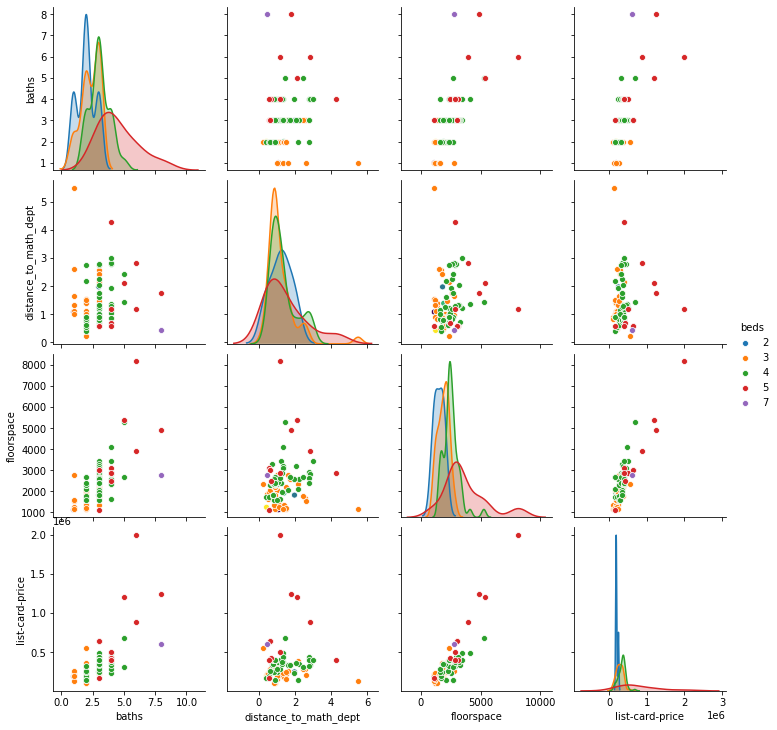

In [51]:
sns.pairplot(properties_df[inputs.union(target)],hue='beds')